In [90]:
import pandas as pd
import numpy as np

In [91]:
df=pd.read_csv(r"A:\Work Docs\DATA Set\Digit Recognizer\Digit Recognizer train.csv")
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
23532      9       0       0       0       0       0       0       0       0   
32388      4       0       0       0       0       0       0       0       0   
22682      1       0       0       0       0       0       0       0       0   
11345      9       0       0       0       0       0       0       0       0   
29381      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
23532       0  ...         0         0         0         0         0   
32388       0  ...         0         0         0         0         0   
22682       0  ...         0         0         0         0         0   
11345       0  ...         0         0         0         0         0   
29381       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
23532         0         0         0         0         0  
32388         0         0         0         0         0  
22682         0         0         0         0         0  
11345         0         0         0         0         0  
29381         0         0         0         0         0  

[5 rows x 785 columns]

In [92]:
import matplotlib.pyplot as plt

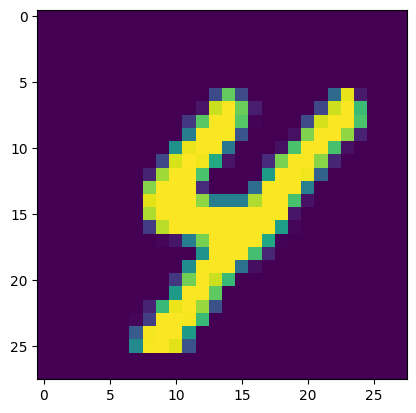

In [93]:
plt.imshow(df.iloc[24965,1:].values.reshape(28,28))

In [94]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred=knn.predict(x_test.values)

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

# Using PCA by sklearn

Standardizing Data

In [101]:
df=pd.read_csv(r"A:\Work Docs\DATA Set\Digit Recognizer\Digit Recognizer train.csv")

In [102]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [104]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [105]:
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [106]:
from sklearn.decomposition import PCA

#n_component=None will take same component as no. of column, we can aslo give how many no. of components we want
pca=PCA(n_components=None)  


# It will calculate Eigen value and eigen vector and will transform the cordicate system
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

#Shape will not change as n_components=None
x_train.shape

(33600, 784)

In [107]:
from sklearn.decomposition import PCA

#n_component= n_components=100 will reduce columns to 100 most efficient columns by using maximum eigen value
pca=PCA(n_components=None)  


# It will calculate Eigen value and eigen vector and will transform the cordicate system
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

#Shape will  change as n_components=100
x_train.shape

(33600, 784)

In [108]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)  

x_train.shape

(33600, 784)

In [109]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)


KNeighborsClassifier()

In [110]:
y_pred=knn.predict(x_test_trf)

In [111]:
accuracy_score(y_test,y_pred)

0.9541666666666667

In [112]:
# for i in range(1,785):
#     pca=PCA(n_components=i)
#     x_train_trf=pca.fit_transform(x_train)
#     x_test_trf=pca.transform(x_test)  

#     knn = KNeighborsClassifier()
#     knn.fit(x_train_trf,y_train)

#     y_pred=knn.predict(x_test_trf)
#     r=accuracy_score(y_test,y_pred)
#     print( i,'  :',r )




# ploting 2d Scatter plot to visualize data in 2d

In [113]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)  

In [114]:
x_train_trf

array([[-2.71864513, -0.49001814],
       [-0.67698618, -6.75366861],
       [-3.0331879 ,  6.51039536],
       ...,
       [ 2.14885824,  0.78145667],
       [ 1.05954992,  0.94768347],
       [17.70262223,  1.96309152]])

In [115]:
import plotly.express as px
y_train_trf=y_train.astype(str)

fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10 
                 )

fig.show()

# ploting 3d Scatter plot to visualize data in 3d

In [116]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)  

In [117]:

y_train_trf=y_train.astype(str)

fig = px.scatter_3d(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 z=x_train_trf[:,2],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10 
                 )

fig.show()

# exploring PCA

In [118]:
#Top Eigen value
pca.explained_variance_

array([40.67111198, 29.17023374, 26.74459447])

In [121]:
# All 784 Eigen Vector
pca.components_

array([[ 1.00000000e+00, -1.76865640e-10,  6.10071952e-10, ...,
         4.90608272e-32,  3.00019073e-33, -2.18722622e-33],
       [ 1.59442623e-10,  9.99999998e-01, -8.75062808e-08, ...,
        -3.00802369e-33,  7.25860969e-35,  2.33529716e-34],
       [-5.17897048e-10,  8.49669961e-08,  9.99999985e-01, ...,
         9.98453587e-33, -1.06801522e-32, -2.72700130e-33]])

In [120]:
pca.components_.shape

(3, 784)

In [122]:
#Variance ratio contribution of each eigen value
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926964, 3.80423876])

Finding Optimum number of ev

In [123]:
pca=PCA(n_components=None)  


x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [124]:
pca.explained_variance_.shape

(784,)

In [125]:
pca.components_.shape

(784, 784)

In [126]:
pca.explained_variance_ratio_*100

array([5.78519225e+00, 4.14926968e+00, 3.80423901e+00, 2.96626277e+00,
       2.58156168e+00, 2.25498018e+00, 1.97306802e+00, 1.77527998e+00,
       1.56865066e+00, 1.43606328e+00, 1.37025484e+00, 1.22725500e+00,
       1.14691200e+00, 1.12302739e+00, 1.05852885e+00, 1.01993106e+00,
       9.57676152e-01, 9.42708817e-01, 9.12489429e-01, 8.90170190e-01,
       8.39940495e-01, 8.20063196e-01, 7.85303229e-01, 7.56739707e-01,
       7.37261022e-01, 7.01884653e-01, 6.97919728e-01, 6.71104483e-01,
       6.39845030e-01, 6.30337291e-01, 6.15350848e-01, 6.02388659e-01,
       5.83673972e-01, 5.78547759e-01, 5.72333148e-01, 5.46399774e-01,
       5.43207369e-01, 5.28172755e-01, 5.13381744e-01, 4.94015474e-01,
       4.87671103e-01, 4.81978768e-01, 4.68204430e-01, 4.59342487e-01,
       4.57660834e-01, 4.49219022e-01, 4.44682221e-01, 4.41540749e-01,
       4.35111936e-01, 4.32032928e-01, 4.21808870e-01, 4.18243127e-01,
       4.07994349e-01, 4.02004913e-01, 3.98335855e-01, 3.94598812e-01,
      

In [129]:
np.cumsum(pca.explained_variance_ratio_*100)

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

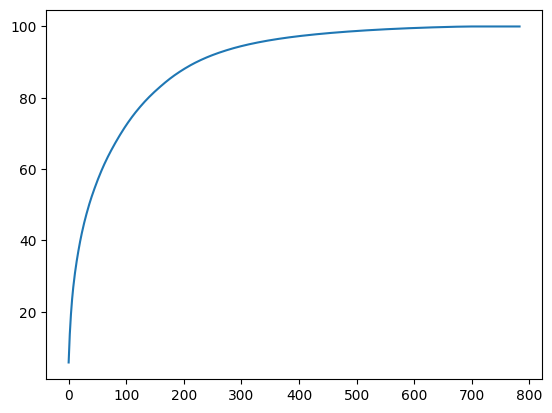

In [130]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))